In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.backends.backend_pdf import PdfPages
import scipy.cluster.hierarchy as spc
from scipy.stats import pearsonr

In [2]:
df=pd.read_csv('Stats_task2.csv')

In [3]:
#Removing extra columns
df =  df.iloc[:,0:16]
df = df.drop('MS1_count',axis = 1)
df = df.drop('MS2_triggered',axis = 1)
df = df.drop('Ion Type',axis = 1)

In [4]:
df

,ID,mz,RT_median,Intensity_11801 600uE CLDC BR1 IS IDA-1,Intensity_11801 600uE CLDC BR2 IS IDA-1,Intensity_11801 LDC 25-HR BR1 IS IDA-1,Intensity_11801 LDC 25-HR BR2 IS IDA-1,Intensity_11801 LDC 31-HR BR1 IS IDA-1,Intensity_11801 LDC 31-HR BR2 IS IDA-1,Intensity_11801 LDC 37-HR BR1 IS IDA-1,Intensity_11801 LDC 37-HR BR2 IS IDA-1,Intensity_11801 LDC 43-HR BR1 IS IDA-1,Intensity_11801 LDC 43-HR BR2 IS IDA-1
0,1,380.916,0.16,931.17,0.00,0.0,0.0,0.00,0.0,819.61,774.15,0.00,771.39
1,2,244.968,0.18,2925.11,1964.07,0.0,0.0,0.00,0.0,2677.71,2370.63,0.00,0.00
2,3,384.912,0.18,775.42,772.65,0.0,0.0,0.00,0.0,562.19,0.00,0.00,678.49
3,4,242.969,0.19,4442.34,2794.34,0.0,0.0,0.00,0.0,3718.51,3660.23,0.00,3348.82
4,5,241.976,0.21,0.00,382.06,0.0,0.0,0.00,0.0,197.62,443.55,0.00,430.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2632,244.968,24.53,4690.34,5378.54,0.0,0.0,3042.17,0.0,0.00,2797.01,3713.84,0.00
2632,2633,242.969,24.54,7128.85,8237.81,0.0,0.0,4778.93,0.0,5507.32,4151.96,0.00,5049.63
2633,2634,340.974,24.55,3625.66,0.00,0.0,0.0,633.37,0.0,1842.82,2069.59,2752.49,258.05
2634,2635,240.972,24.56,13734.50,12818.58,0.0,0.0,5922.76,0.0,7523.57,6936.35,9466.04,9308.27


In [5]:
df2 = df[['Intensity_11801 600uE CLDC BR1 IS IDA-1',
       'Intensity_11801 600uE CLDC BR2 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 25-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 31-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 37-HR BR2 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR1 IS IDA-1',
       'Intensity_11801 LDC 43-HR BR2 IS IDA-1']]

In [6]:
df2 = df2.transpose()
df2

,0,1,2,3,4,5,6,7,8,9,...,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635
Intensity_11801 600uE CLDC BR1 IS IDA-1,931.17,2925.11,775.42,4442.34,0.00,5981.98,1885.12,0.00,13498.31,2453.77,...,0.00,2211.55,0.00,0.00,7542.05,4690.34,7128.85,3625.66,13734.50,0.00
Intensity_11801 600uE CLDC BR2 IS IDA-1,0.00,1964.07,772.65,2794.34,382.06,5059.50,1188.67,0.00,12262.43,2206.99,...,1739.01,2054.97,7614.06,0.00,7933.93,5378.54,8237.81,0.00,12818.58,733.88
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2086.35,0.00,164.85,4753.15,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3262.26,0.00,...,0.00,3865.35,5069.21,2136.95,0.00,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2261.54,467.48,...,1617.66,329.44,4543.65,0.00,5218.75,3042.17,4778.93,633.37,5922.76,0.00
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.00,0.00,0.00,0.00,0.00,0.00,316.80,325.13,2125.44,0.00,...,192.69,0.00,0.00,0.00,5480.97,0.00,0.00,0.00,0.00,0.00
Intensity_11801 LDC 37-HR BR1 IS IDA-1,819.61,2677.71,562.19,3718.51,197.62,0.00,3003.13,1966.53,17272.05,3623.52,...,0.00,730.67,4409.80,0.00,5110.31,0.00,5507.32,1842.82,7523.57,756.05
Intensity_11801 LDC 37-HR BR2 IS IDA-1,774.15,2370.63,0.00,3660.23,443.55,5776.15,0.00,2032.08,0.00,0.00,...,0.00,0.00,0.00,240.78,3814.77,2797.01,4151.96,2069.59,6936.35,747.74
Intensity_11801 LDC 43-HR BR1 IS IDA-1,0.00,0.00,0.00,0.00,0.00,2333.64,0.00,0.00,0.00,0.00,...,3516.09,0.00,6583.76,2028.11,7347.51,3713.84,0.00,2752.49,9466.04,757.43
Intensity_11801 LDC 43-HR BR2 IS IDA-1,771.39,0.00,678.49,3348.82,430.37,5357.52,0.00,1628.27,11688.03,2740.67,...,321.16,0.00,0.00,0.00,5593.80,0.00,5049.63,258.05,9308.27,814.20


In [7]:
df3 = df.transpose()

In [8]:
#count number of zeroes in each column
flag=0
arr=[]
for i in range(0,2635):
    cnt=0
    for j in range(0,10):
        if df2.iloc[j][i]==0:
            cnt = cnt+1
    if cnt>5:
        arr.append(i)
        flag = 1

In [9]:
len(arr)

516

In [10]:
df3.drop(df3.columns[arr], axis=1,inplace=True)

In [11]:
df3

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
ID,4.000,6.000,9.000,10.000,12.000,13.000,16.00,17.000,18.000,19.000,...,2626.000,2627.000,2628.000,2629.000,2631.000,2632.000,2633.000,2634.000,2635.000,2636.000
mz,242.969,240.971,201.028,202.029,301.029,343.041,589.05,366.038,449.038,433.023,...,299.009,284.033,533.994,332.984,398.961,244.968,242.969,340.974,240.972,384.913
RT_median,0.190,0.410,0.820,0.820,0.820,0.830,0.85,0.860,0.870,0.880,...,24.220,24.230,24.240,24.260,24.510,24.530,24.540,24.550,24.560,24.560
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.340,5981.980,13498.310,2453.770,4031.200,6784.380,1284.72,0.000,4612.400,1694.850,...,0.000,0.000,2211.550,0.000,7542.050,4690.340,7128.850,3625.660,13734.500,0.000
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.340,5059.500,12262.430,2206.990,4089.980,5053.630,1272.73,2141.590,3577.450,2423.310,...,0.000,1739.010,2054.970,7614.060,7933.930,5378.540,8237.810,0.000,12818.580,733.880
Intensity_11801 LDC 25-HR BR1 IS IDA-1,0.000,0.000,0.000,0.000,0.000,264.060,0.00,0.000,0.000,1242.510,...,0.000,2086.350,0.000,164.850,0.000,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 25-HR BR2 IS IDA-1,0.000,0.000,3262.260,0.000,891.480,0.000,0.00,526.620,0.000,0.000,...,5662.830,0.000,3865.350,5069.210,0.000,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 31-HR BR1 IS IDA-1,0.000,0.000,2261.540,467.480,506.960,998.690,681.75,0.000,0.000,0.000,...,0.000,1617.660,329.440,4543.650,5218.750,3042.170,4778.930,633.370,5922.760,0.000
Intensity_11801 LDC 31-HR BR2 IS IDA-1,0.000,0.000,2125.440,0.000,445.730,708.490,0.00,0.000,0.000,0.000,...,6063.010,192.690,0.000,0.000,5480.970,0.000,0.000,0.000,0.000,0.000
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.510,0.000,17272.050,3623.520,3965.110,8227.620,3477.34,2500.800,4394.090,0.000,...,6326.740,0.000,730.670,4409.800,5110.310,0.000,5507.320,1842.820,7523.570,756.050


In [12]:
#replace missing value with median intensity
for i in range(0,2120):
    medianMinPA = (df3.iloc[3:13,i].loc[df3.iloc[3:13,i] != 0.00]).median()
    df3.iloc[3:13,i]=df3.iloc[3:13,i].replace(0.00,medianMinPA)

In [13]:
df3

,3,5,8,9,11,12,15,16,17,18,...,2625,2626,2627,2628,2630,2631,2632,2633,2634,2635
ID,4.000,6.000,9.000,10.000,12.000,13.000,16.00,17.000,18.000,19.000,...,2626.000,2627.000,2628.000,2629.000,2631.000,2632.000,2633.000,2634.000,2635.000,2636.000
mz,242.969,240.971,201.028,202.029,301.029,343.041,589.05,366.038,449.038,433.023,...,299.009,284.033,533.994,332.984,398.961,244.968,242.969,340.974,240.972,384.913
RT_median,0.190,0.410,0.820,0.820,0.820,0.830,0.85,0.860,0.870,0.880,...,24.220,24.230,24.240,24.260,24.510,24.530,24.540,24.550,24.560,24.560
Intensity_11801 600uE CLDC BR1 IS IDA-1,4442.340,5981.980,13498.310,2453.770,4031.200,6784.380,1284.72,2330.620,4612.400,1694.850,...,6326.740,1678.335,2211.550,4806.430,7542.050,4690.340,7128.850,3625.660,13734.500,756.050
Intensity_11801 600uE CLDC BR2 IS IDA-1,2794.340,5059.500,12262.430,2206.990,4089.980,5053.630,1272.73,2141.590,3577.450,2423.310,...,6326.740,1739.010,2054.970,7614.060,7933.930,5378.540,8237.810,1956.205,12818.580,733.880
Intensity_11801 LDC 25-HR BR1 IS IDA-1,3660.230,5357.520,11688.030,2453.770,3399.380,264.060,1284.72,2330.620,4580.980,1242.510,...,6326.740,2086.350,2054.970,164.850,5537.385,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 25-HR BR2 IS IDA-1,3660.230,5357.520,3262.260,2453.770,891.480,5431.425,1284.72,526.620,4580.980,1822.640,...,5662.830,1678.335,3865.350,5069.210,5537.385,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 31-HR BR1 IS IDA-1,3660.230,5357.520,2261.540,467.480,506.960,998.690,681.75,2330.620,4580.980,1822.640,...,6326.740,1617.660,329.440,4543.650,5218.750,3042.170,4778.930,633.370,5922.760,756.050
Intensity_11801 LDC 31-HR BR2 IS IDA-1,3660.230,5357.520,2125.440,2453.770,445.730,708.490,1284.72,2330.620,4580.980,1822.640,...,6063.010,192.690,2054.970,4806.430,5480.970,3713.840,5278.475,1956.205,9308.270,756.050
Intensity_11801 LDC 37-HR BR1 IS IDA-1,3718.510,5357.520,17272.050,3623.520,3965.110,8227.620,3477.34,2500.800,4394.090,1822.640,...,6326.740,1678.335,730.670,4409.800,5110.310,3713.840,5507.320,1842.820,7523.570,756.050


In [14]:
#renaming columns to consecutive index
j=0
for i in range(0,2120):
    df3.columns.values[i] = j;
    j = j+1

In [15]:
for i in range(0,2120):
    df3.iloc[3:13,i:i+1] = np.log(df3.iloc[3:13,i:i+1])

In [16]:
df3

,0,1,2,3,4,5,6,7,8,9,...,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119
ID,4.000000,6.000000,9.000000,10.000000,12.000000,13.000000,16.000000,17.000000,18.000000,19.000000,...,2626.000000,2627.000000,2628.000000,2629.000000,2631.000000,2632.000000,2633.000000,2634.000000,2635.000000,2636.000000
mz,242.969000,240.971000,201.028000,202.029000,301.029000,343.041000,589.050000,366.038000,449.038000,433.023000,...,299.009000,284.033000,533.994000,332.984000,398.961000,244.968000,242.969000,340.974000,240.972000,384.913000
RT_median,0.190000,0.410000,0.820000,0.820000,0.820000,0.830000,0.850000,0.860000,0.870000,0.880000,...,24.220000,24.230000,24.240000,24.260000,24.510000,24.530000,24.540000,24.550000,24.560000,24.560000
Intensity_11801 600uE CLDC BR1 IS IDA-1,8.398937,8.696507,9.510320,7.805381,8.301819,8.822378,7.158296,7.753890,8.436504,7.435350,...,8.752540,7.425558,7.701449,8.477710,8.928249,8.453260,8.871905,8.195792,9.527666,6.628108
Intensity_11801 600uE CLDC BR2 IS IDA-1,7.935351,8.529023,9.414295,7.699385,8.316295,8.527862,7.148919,7.669304,8.182406,7.792890,...,8.752540,7.461071,7.628017,8.937752,8.978904,8.590172,9.016490,7.578762,9.458651,6.598346
Intensity_11801 LDC 25-HR BR1 IS IDA-1,8.205281,8.586256,9.366321,7.805381,8.131348,5.576176,7.158296,7.753890,8.429668,7.124889,...,8.752540,7.643171,7.628017,5.105036,8.619278,8.219822,8.571393,7.578762,9.138659,6.628108
Intensity_11801 LDC 25-HR BR2 IS IDA-1,8.205281,8.586256,8.090175,7.805381,6.792883,8.599957,7.158296,6.266479,8.429668,7.508041,...,8.641679,7.425558,8.259808,8.530940,8.619278,8.219822,8.571393,7.578762,9.138659,6.628108
Intensity_11801 LDC 31-HR BR1 IS IDA-1,8.205281,8.586256,7.723801,6.147357,6.228432,6.906444,6.524663,7.753890,8.429668,7.508041,...,8.752540,7.388736,5.797394,8.421486,8.560013,8.020326,8.471972,6.451055,8.686558,6.628108
Intensity_11801 LDC 31-HR BR2 IS IDA-1,8.205281,8.586256,7.661734,7.805381,6.099713,6.563136,7.158296,7.753890,8.429668,7.508041,...,8.709962,5.261083,7.628017,8.477710,8.609037,8.219822,8.571393,7.578762,9.138659,6.628108
Intensity_11801 LDC 37-HR BR1 IS IDA-1,8.221078,8.586256,9.756845,8.195201,8.285289,9.015252,8.154023,7.824366,8.388016,7.508041,...,8.752540,7.425558,6.593962,8.391585,8.539015,8.219822,8.613833,7.519052,8.925796,6.628108


In [17]:
a = []
df3 = df3.T
for i in range(0,2120):
    a.append(df3.iloc[i,3:13].median())
df3['Med'] = a
df3 = df3.T

In [18]:
def isotope(*ind):
    rt_tol = 0.01 
    i = ind[0][0]
    j = ind[-1][-1]
    dframe = df3.iloc[1:13,i:j+1].T
#   print(dframe)
    for x in range(0,j-i-1): 
        for y in range(x+1,j-i):
            d1 = df3.iloc[3:13,x]
            d2 = df3.iloc[3:13,y]
            correlation, _ = pearsonr(d1, d2)
            
            if (1.003-0.01<= abs(dframe.iat[x,0]-dframe.iat[y,0]) <=1.003+0.01) and (abs(dframe.iat[x,1]-dframe.iat[y,1])<rt_tol) and (correlation>0.5):
                print("Isotopes are m/z %d and %d" %(dframe.iat[x,0],dframe.iat[y,0]))
                

In [20]:
def corr(*ind):
    i = ind[0][0]
    j = ind[-1][-1]
#     print(i)
#     print(j)
    df_small = df3.iloc[3:13,i:j+1]
    print(df_small)
    correlation_mat = df_small.corr()
    sns.heatmap(correlation_mat, annot = True)
    plt.show()
    corelat = correlation_mat .values
    pdist = spc.distance.pdist(corelat)
    linkage = spc.linkage(pdist, method='average')
    idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
    print("Cluster - ",idx)
    print("Number of cluster = %d" %idx.max())
    
    1 2 3 1 1 3
    col = df_small.columns()
    for i in range(1,idx.max()+1):
        clust = []
        cnt = 0
        for j in range(0,len(idx)):
            if idx[j] == i:
                clust.append(col[i])
                cnt = cnt + 1;
        if(cnt>1):
            maxi = 0
            for i in range(0,len(clust)):
                if(df3.iat[14,clust[i]]>maxi):
                    maxi = df3.iat[14,clust[i]]
                    maxin = i
                    string = ["M-H"]
                    
            

Bin -  []
Bin -  [0]
Bin -  [1, 2, 3]
                                                1         2         3
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.696507  9.510320  7.805381
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.529023  9.414295  7.699385
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.586256  9.366321  7.805381
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.586256  8.090175  7.805381
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.586256  7.723801  6.147357
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.586256  7.661734  7.805381
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.586256  9.756845  8.195201
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.661493  9.366321  7.805381
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.755185  9.366321  7.805381
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.586256  9.366321  7.915958


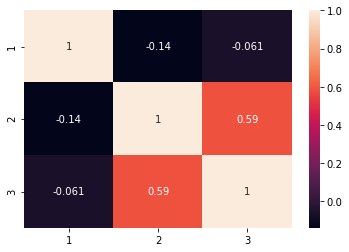

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [4]
Bin -  [5]
Bin -  [6]
Bin -  [7]
Bin -  [8, 9]
                                                8         9
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.436504  7.435350
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.182406  7.792890
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.429668  7.124889
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.429668  7.508041
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.429668  7.508041
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.429668  7.508041
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.388016  7.508041
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.535827  7.575805
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.429668  6.679624
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.429668  7.788025


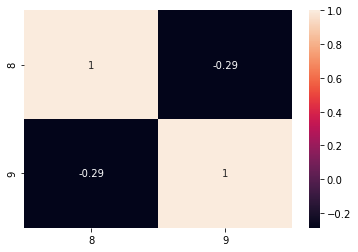

Cluster -  [1 2]
Number of cluster = 2
Bin -  [10, 11, 12, 13, 14]
                                               10        11        12  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.792747  8.830436  9.103439   
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.809316  8.730845  9.141854   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.792747  6.374292  7.653334   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.792747  8.730845  7.849632   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.041893  8.730845  9.141854   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.792747  8.730845  9.141854   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.732505  8.952235  9.347499   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.851277  8.699296  9.288170   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.792747  7.657240  9.141854   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.792747  8.783882  9.213318   

                                                13        14  
Intensity_11801 600uE CLDC BR1 IS IDA-1   9.988106  8.643636  
Int

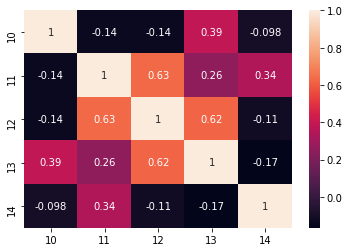

Cluster -  [3 1 1 2 4]
Number of cluster = 4
Bin -  [15, 16, 17]
                                               15        16        17
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.181343  9.812875  8.917560
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.945912  9.692786  8.958063
Intensity_11801 LDC 25-HR BR1 IS IDA-1   9.070540  6.987010  7.345759
Intensity_11801 LDC 25-HR BR2 IS IDA-1   9.070540  8.762939  7.488534
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.729731  8.670093  8.917560
Intensity_11801 LDC 31-HR BR2 IS IDA-1   9.070540  8.327767  8.917560
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.304867  9.998077  9.085637
Intensity_11801 LDC 37-HR BR2 IS IDA-1   9.070540  5.385412  7.912548
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.214782  8.835174  8.917560
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.383284  9.948114  9.216629


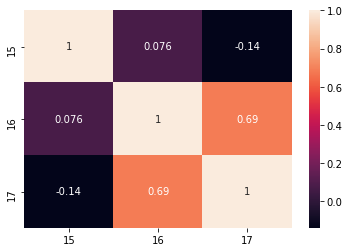

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [18, 19]
                                               18        19
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.343861  7.525721
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.289532  6.724950
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.247791  6.724950
Intensity_11801 LDC 25-HR BR2 IS IDA-1   6.716328  6.012125
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.247791  6.724950
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.247791  6.724950
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.159847  6.724950
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.247791  7.537323
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.247791  6.051100
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.247791  6.724950


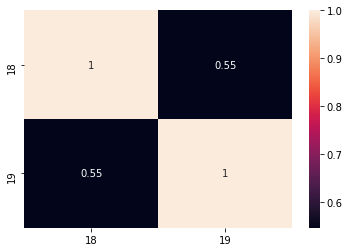

Cluster -  [1 2]
Number of cluster = 2
Bin -  [20, 21]
                                               20        21
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.242912  8.749961
Intensity_11801 600uE CLDC BR2 IS IDA-1  9.050864  8.597703
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.855047  7.032183
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.653087  8.597703
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.855047  6.767677
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.469204  8.597703
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.290336  8.723397
Intensity_11801 LDC 37-HR BR2 IS IDA-1   9.458372  8.705064
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.285896  7.510069
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.611314  8.597703


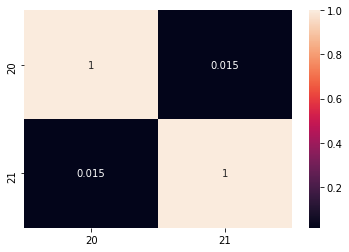

Cluster -  [1 2]
Number of cluster = 2
Bin -  [22, 23, 24]
                                               22         23        24
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.591354   9.700917  9.000323
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.444509   9.726499  9.135857
Intensity_11801 LDC 25-HR BR1 IS IDA-1   9.540150   8.820072  8.367707
Intensity_11801 LDC 25-HR BR2 IS IDA-1   9.540150   8.754044  7.303561
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.630976   9.084532  8.892945
Intensity_11801 LDC 31-HR BR2 IS IDA-1   9.540150   9.700917  8.892945
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.540150  10.048196  9.145655
Intensity_11801 LDC 37-HR BR2 IS IDA-1   9.628916  10.059808  8.772635
Intensity_11801 LDC 43-HR BR1 IS IDA-1   9.540150   9.330893  8.892945
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.540150   9.917769  8.892945


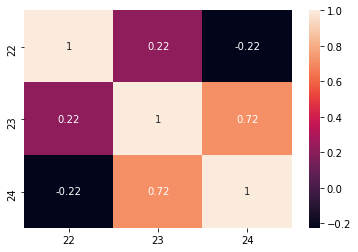

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [25, 26]
                                                25         26
Intensity_11801 600uE CLDC BR1 IS IDA-1  10.490172  10.453366
Intensity_11801 600uE CLDC BR2 IS IDA-1  10.914184  11.054615
Intensity_11801 LDC 25-HR BR1 IS IDA-1    9.976779  10.135185
Intensity_11801 LDC 25-HR BR2 IS IDA-1    9.962112  10.070643
Intensity_11801 LDC 31-HR BR1 IS IDA-1    9.354446   9.922289
Intensity_11801 LDC 31-HR BR2 IS IDA-1   10.490172   9.503155
Intensity_11801 LDC 37-HR BR1 IS IDA-1   11.209078  11.261616
Intensity_11801 LDC 37-HR BR2 IS IDA-1   10.779428  10.861076
Intensity_11801 LDC 43-HR BR1 IS IDA-1   10.234004   9.773712
Intensity_11801 LDC 43-HR BR2 IS IDA-1   10.979266  11.243081


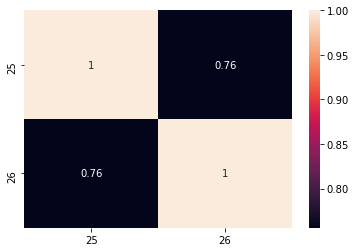

Cluster -  [1 2]
Number of cluster = 2
Bin -  [27, 28]
                                               27        28
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.857927  9.621147
Intensity_11801 600uE CLDC BR2 IS IDA-1  9.868392  9.306946
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.643838  8.163066
Intensity_11801 LDC 25-HR BR2 IS IDA-1   9.868392  7.939448
Intensity_11801 LDC 31-HR BR1 IS IDA-1   9.868392  8.221783
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.700621  9.204971
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.878748  9.573179
Intensity_11801 LDC 37-HR BR2 IS IDA-1   9.986425  9.204971
Intensity_11801 LDC 43-HR BR1 IS IDA-1   9.868392  8.688339
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.991022  9.584869


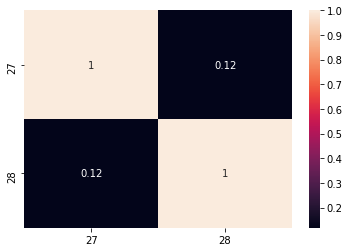

Cluster -  [1 2]
Number of cluster = 2
Bin -  [29, 30, 31, 32, 33, 34, 35, 36, 37]
                                               29         30        31  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  7.392373  11.248111  9.275027   
Intensity_11801 600uE CLDC BR2 IS IDA-1  7.392373  11.007491  9.088569   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.304778  10.136851  8.224314   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.472910  10.183359  8.981604   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.116216  10.031290  7.186931   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.392373   9.575841  8.981604   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.272136  11.327555  9.081293   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.121017  10.949240  8.870867   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.019896   9.844573  8.278591   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   7.392373  11.269256  9.415316   

                                               32         33         34  \
Intensity_11801 600uE CLDC 

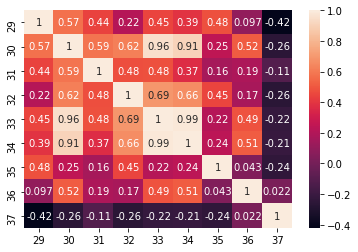

Cluster -  [1 1 1 1 1 1 1 1 2]
Number of cluster = 2
Bin -  [38, 39, 40, 41, 42]
                                                38        39        40  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  10.495356  7.432726  8.228874   
Intensity_11801 600uE CLDC BR2 IS IDA-1  10.246188  7.550829  8.212354   
Intensity_11801 LDC 25-HR BR1 IS IDA-1    9.045048  7.258926  7.879394   
Intensity_11801 LDC 25-HR BR2 IS IDA-1    9.188052  7.550829  8.212354   
Intensity_11801 LDC 31-HR BR1 IS IDA-1    8.973918  7.550829  8.212354   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   10.246188  7.550829  8.212354   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   10.565447  7.548298  8.395733   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   10.305508  7.747821  7.527735   
Intensity_11801 LDC 43-HR BR1 IS IDA-1    9.587519  7.553355  8.212354   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   10.626250  7.827691  8.212354   

                                               41         42  
Intensity_11801 600uE CLDC BR1 IS IDA-1  

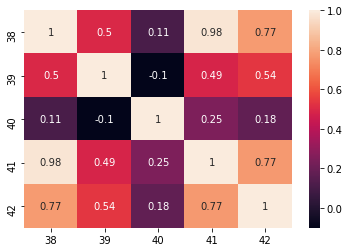

Cluster -  [1 2 3 1 1]
Number of cluster = 3
Bin -  [43, 44, 45, 46]
                                               43        44         45  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.464380  8.571935  11.328002   
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.657986  8.173859  11.081164   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.054691  8.138436  10.187244   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   9.140356  8.084223  10.105504   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   9.140356  8.010024   9.960364   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   9.140356  8.173859   9.379298   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.584450  8.795773  11.337282   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   9.140356  7.733635  10.884134   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.318685  8.208070  10.269286   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.606183  8.665480  11.321399   

                                               46  
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.178277  
Intensity_11

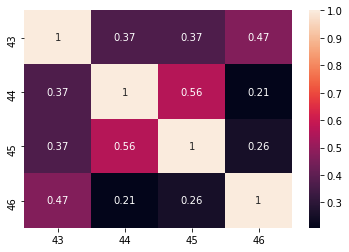

Cluster -  [3 1 2 4]
Number of cluster = 4
Bin -  [47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
                                               47         48        49  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.094503  10.779532  8.296287   
Intensity_11801 600uE CLDC BR2 IS IDA-1  9.002488  10.607106  8.262149   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.917890   9.838553  8.262149   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   9.002488   9.718430  8.262149   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.219364   9.564632  8.262149   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   9.002488   9.161887  8.262149   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.002488  10.777537  8.513328   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   9.043493  10.523085  8.258969   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.264634   9.941866  8.262149   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.268786  10.861825  8.220503   

                                               50        51        52  \
Inten

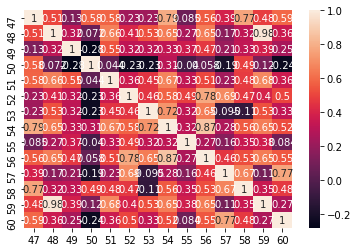

Cluster -  [1 4 3 5 4 2 4 4 3 4 2 1 4 2]
Number of cluster = 5
Bin -  [61, 62, 63]
                                                61        62        63
Intensity_11801 600uE CLDC BR1 IS IDA-1   9.976360  8.932770  7.213091
Intensity_11801 600uE CLDC BR2 IS IDA-1   9.875657  9.027476  7.213091
Intensity_11801 LDC 25-HR BR1 IS IDA-1    8.730160  8.943632  7.213091
Intensity_11801 LDC 25-HR BR2 IS IDA-1    8.366140  8.943632  7.213091
Intensity_11801 LDC 31-HR BR1 IS IDA-1    8.762380  8.943632  7.213091
Intensity_11801 LDC 31-HR BR2 IS IDA-1    9.846143  7.694639  6.789400
Intensity_11801 LDC 37-HR BR1 IS IDA-1   10.134885  9.112592  8.017251
Intensity_11801 LDC 37-HR BR2 IS IDA-1    9.846143  8.789748  6.809900
Intensity_11801 LDC 43-HR BR1 IS IDA-1    8.702470  8.943632  7.213091
Intensity_11801 LDC 43-HR BR2 IS IDA-1    9.958733  8.954378  7.726182


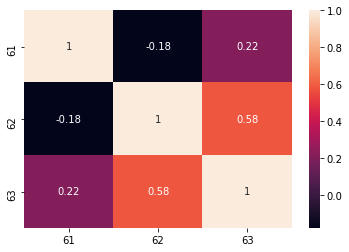

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [64, 65, 66, 67, 68, 69]
                                                64        65        66  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  10.748921  7.575026  8.536453   
Intensity_11801 600uE CLDC BR2 IS IDA-1  10.670831  7.020396  8.498766   
Intensity_11801 LDC 25-HR BR1 IS IDA-1    9.698220  6.462031  8.038573   
Intensity_11801 LDC 25-HR BR2 IS IDA-1    9.652403  7.296823  8.083474   
Intensity_11801 LDC 31-HR BR1 IS IDA-1    9.756127  6.474970  7.786585   
Intensity_11801 LDC 31-HR BR2 IS IDA-1    9.234040  7.296823  8.229284   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   10.951397  7.815175  8.831097   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   10.577694  7.296823  8.229284   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   10.138159  7.296823  8.229284   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   10.955329  7.513153  8.229284   

                                               67         68        69  
Intensity_11801 600uE CLDC BR1 IS IDA-1

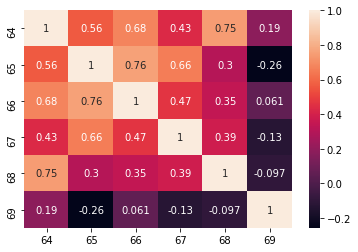

Cluster -  [1 1 1 1 1 2]
Number of cluster = 2
Bin -  [70, 71, 72]
                                               70        71        72
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.963845  8.958721  7.961311
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.963845  9.174606  7.961311
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.570134  7.343788  6.941644
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.963845  8.954758  7.961311
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.963845  7.766451  7.053897
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.327281  8.954758  7.961311
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.275509  9.210000  7.961311
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.970099  8.950779  7.973155
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.963845  6.418251  7.961311
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.963845  9.176567  8.054450


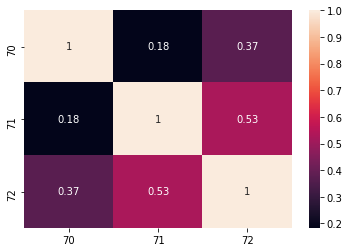

Cluster -  [3 1 2]
Number of cluster = 3
Bin -  [73, 74, 75, 76, 77]
                                                73        74         75  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  10.214922  7.125404  10.029617   
Intensity_11801 600uE CLDC BR2 IS IDA-1  10.123857  6.802373   9.913637   
Intensity_11801 LDC 25-HR BR1 IS IDA-1    8.679718  7.069772   8.515131   
Intensity_11801 LDC 25-HR BR2 IS IDA-1    8.800792  7.069772   9.856728   
Intensity_11801 LDC 31-HR BR1 IS IDA-1    9.031783  7.069772   8.674515   
Intensity_11801 LDC 31-HR BR2 IS IDA-1    9.998165  7.069772   9.856728   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   10.153219  6.965835   9.856728   
Intensity_11801 LDC 37-HR BR2 IS IDA-1    9.854371  7.069772   9.700703   
Intensity_11801 LDC 43-HR BR1 IS IDA-1    9.998165  7.069772   9.856728   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   10.203665  7.171672   9.993057   

                                               76        77  
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.

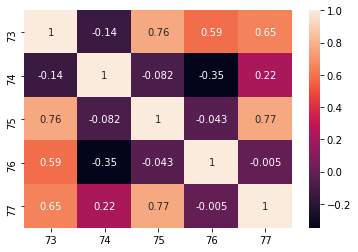

Cluster -  [1 3 1 2 1]
Number of cluster = 3
Bin -  [78]
Bin -  [79]
Bin -  [80]
Bin -  [81]
Bin -  [82]
Bin -  [83]
Bin -  [84]
Bin -  [85]
Bin -  [86]
Bin -  [87, 88]
                                                87        88
Intensity_11801 600uE CLDC BR1 IS IDA-1  10.778961  9.338909
Intensity_11801 600uE CLDC BR2 IS IDA-1   8.639407  9.301942
Intensity_11801 LDC 25-HR BR1 IS IDA-1    8.628606  9.171660
Intensity_11801 LDC 25-HR BR2 IS IDA-1    8.628606  8.648299
Intensity_11801 LDC 31-HR BR1 IS IDA-1    8.628606  7.755917
Intensity_11801 LDC 31-HR BR2 IS IDA-1    8.628606  9.301942
Intensity_11801 LDC 37-HR BR1 IS IDA-1    8.628606  9.482939
Intensity_11801 LDC 37-HR BR2 IS IDA-1    7.377871  9.539151
Intensity_11801 LDC 43-HR BR1 IS IDA-1    8.628606  9.254252
Intensity_11801 LDC 43-HR BR2 IS IDA-1    8.128503  9.526113


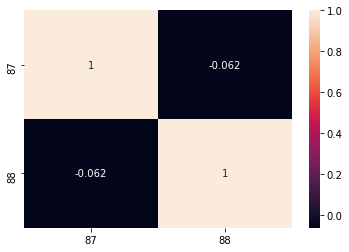

Cluster -  [1 2]
Number of cluster = 2
Bin -  [89]
Bin -  [90, 91, 92, 93, 94, 95, 96]
                                               90        91        92  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.120704  6.595890  8.536794   
Intensity_11801 600uE CLDC BR2 IS IDA-1  9.010106  7.109790  8.776812   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.943130  7.109790  7.832125   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.427724  7.109790  7.493935   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.957069  7.109790  7.213069   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.943130  7.109790  7.421130   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.698982  7.109790  7.677259   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.414906  7.386873  7.677259   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.694638  6.598959  7.677259   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.505075  7.199238  7.677259   

                                               93        94        95  \
Intensity_11801 600uE CLDC BR1 IS ID

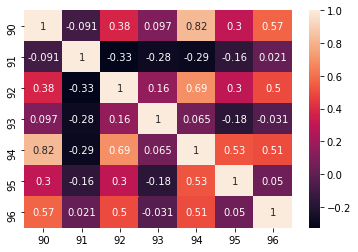

Cluster -  [1 3 1 2 1 1 1]
Number of cluster = 3
Bin -  [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
                                              97        98        99   \
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.843898  6.974619  8.145074   
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.582782  6.863396  8.245531   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.843898  6.592181  7.888226   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.038935  6.960357  7.888226   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.843898  6.960357  7.888226   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.843898  6.960357  7.888226   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.570066  6.960357  7.442803   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.843898  6.960357  7.888226   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.843898  6.960357  6.493073   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.194414  7.080186  7.888226   

                                              1

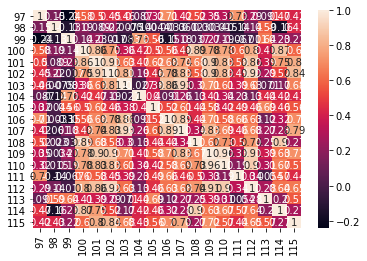

Cluster -  [2 3 1 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2]
Number of cluster = 3
Isotopes are m/z 558 and 559
Bin -  [116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
                                               116        117       118  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  11.226584  10.125388  9.756950   
Intensity_11801 600uE CLDC BR2 IS IDA-1  11.520737  10.062360  9.902278   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   10.088158   7.298580  9.070448   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   10.369971   7.580965  8.913661   
Intensity_11801 LDC 31-HR BR1 IS IDA-1    9.904509   7.424350  8.675483   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   11.110718   7.255323  8.411673   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   11.467564   9.241972  9.951506   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   11.110718   8.964933  9.542230   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   10.393474   8.473022  8.858044   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   11.331081

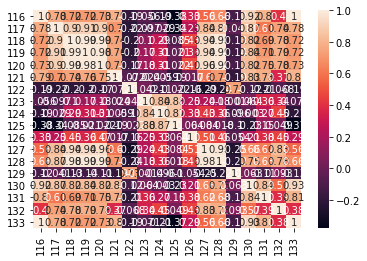

Cluster -  [1 1 1 1 1 1 2 3 3 3 1 1 1 2 1 1 1 1]
Number of cluster = 3
Isotopes are m/z 351 and 352
Isotopes are m/z 352 and 353
Bin -  [134, 135, 136, 137, 138, 139]
                                              134       135       136  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.002450  8.893397  9.393345   
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.406143  9.031173  9.815114   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.395462  7.395114  7.604875   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.395462  8.095157  8.690767   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.395462  8.641909  9.291856   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.395462  8.882922  8.201501   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.534803  9.073087  9.583749   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.135171  8.882922  9.291856   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.395462  8.472154  8.982351   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.395462  9.136608  9.540494   

                             

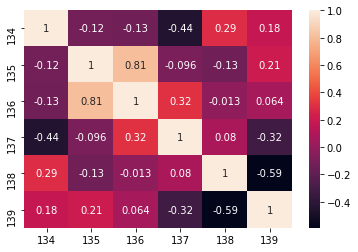

Cluster -  [1 3 3 4 2 5]
Number of cluster = 5
Bin -  [140, 141]
                                              140       141
Intensity_11801 600uE CLDC BR1 IS IDA-1  7.633442  7.849605
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.375291  8.391176
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.972792  7.929035
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.348967  7.929035
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.972792  7.209000
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.972792  7.929035
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.367964  8.255462
Intensity_11801 LDC 37-HR BR2 IS IDA-1   7.627686  8.002617
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.972792  6.970223
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.225701  7.929035


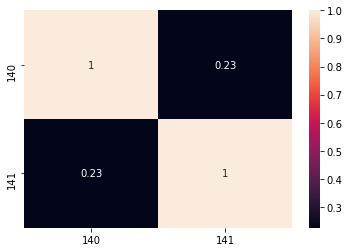

Cluster -  [1 2]
Number of cluster = 2
Bin -  [142]
Bin -  [143]
Bin -  [144, 145, 146, 147]
                                              144       145       146  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  7.774679  8.001713  9.696098   
Intensity_11801 600uE CLDC BR2 IS IDA-1  7.756101  8.021804  9.672743   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.767154  7.784997  4.796121   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.767154  7.784997  8.821741   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.767154  7.784997  8.394214   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.767154  7.784997  8.487499   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   7.800261  7.525004  9.607743   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   7.767154  7.062980  8.950775   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   6.601801  6.914502  8.584536   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   7.767154  7.991152  9.159592   

                                              147  
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.537539  

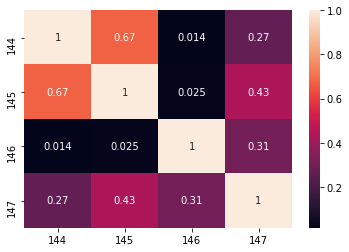

Cluster -  [1 1 3 2]
Number of cluster = 3
Bin -  [148, 149]
                                              148        149
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.197120  10.853394
Intensity_11801 600uE CLDC BR2 IS IDA-1  9.087368  10.970501
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.823105  10.130578
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.805373  10.130578
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.823105   9.370444
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.967904   5.963425
Intensity_11801 LDC 37-HR BR1 IS IDA-1   9.102907  10.302902
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.462893   9.922246
Intensity_11801 LDC 43-HR BR1 IS IDA-1   8.090893   9.556525
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.287302  10.875808


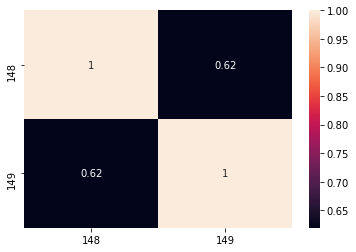

Cluster -  [1 2]
Number of cluster = 2
Bin -  [150]
Bin -  [151, 152]
                                              151       152
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.106400  7.710187
Intensity_11801 600uE CLDC BR2 IS IDA-1  7.995398  7.813947
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.995398  7.489546
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.995398  7.489546
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.995398  7.489546
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.995398  7.489546
Intensity_11801 LDC 37-HR BR1 IS IDA-1   7.470936  6.735578
Intensity_11801 LDC 37-HR BR2 IS IDA-1   6.817907  6.836334
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.995398  7.489546
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.210263  7.489546


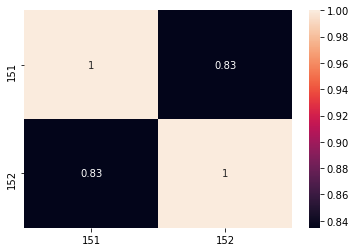

Cluster -  [1 2]
Number of cluster = 2
Bin -  [153]
Bin -  [154, 155]
                                              154       155
Intensity_11801 600uE CLDC BR1 IS IDA-1  7.152711  6.596163
Intensity_11801 600uE CLDC BR2 IS IDA-1  7.802512  7.561553
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.152711  7.383269
Intensity_11801 LDC 25-HR BR2 IS IDA-1   6.216426  7.383269
Intensity_11801 LDC 31-HR BR1 IS IDA-1   6.177197  7.383269
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.152711  7.383269
Intensity_11801 LDC 37-HR BR1 IS IDA-1   7.240191  7.383269
Intensity_11801 LDC 37-HR BR2 IS IDA-1   7.385423  7.195660
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.152711  7.383269
Intensity_11801 LDC 43-HR BR2 IS IDA-1   7.056839  7.662242


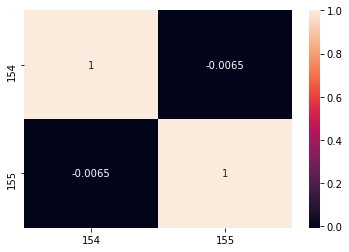

Cluster -  [1 2]
Number of cluster = 2
Bin -  [156]
Bin -  [157]
Bin -  [158]
Bin -  [159, 160]
                                               159       160
Intensity_11801 600uE CLDC BR1 IS IDA-1  10.961079  8.813235
Intensity_11801 600uE CLDC BR2 IS IDA-1  11.097562  8.916118
Intensity_11801 LDC 25-HR BR1 IS IDA-1    9.115953  8.916118
Intensity_11801 LDC 25-HR BR2 IS IDA-1   10.610521  8.916118
Intensity_11801 LDC 31-HR BR1 IS IDA-1   10.187870  8.916118
Intensity_11801 LDC 31-HR BR2 IS IDA-1   10.290271  7.403061
Intensity_11801 LDC 37-HR BR1 IS IDA-1   11.014505  8.916118
Intensity_11801 LDC 37-HR BR2 IS IDA-1   11.146594  8.916118
Intensity_11801 LDC 43-HR BR1 IS IDA-1   10.658964  8.919556
Intensity_11801 LDC 43-HR BR2 IS IDA-1   11.640822  9.946093


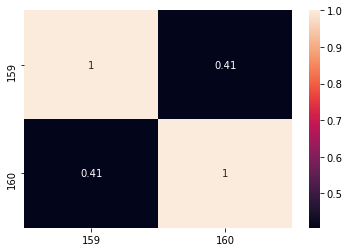

Cluster -  [1 2]
Number of cluster = 2
Bin -  [161]
Bin -  [162, 163, 164, 165]
                                               162       163       164  \
Intensity_11801 600uE CLDC BR1 IS IDA-1   9.333267  9.502623  8.798210   
Intensity_11801 600uE CLDC BR2 IS IDA-1   9.792617  9.362964  8.997439   
Intensity_11801 LDC 25-HR BR1 IS IDA-1    9.500765  9.287350  8.798210   
Intensity_11801 LDC 25-HR BR2 IS IDA-1    8.080420  9.287350  8.798210   
Intensity_11801 LDC 31-HR BR1 IS IDA-1    9.500765  9.287350  8.798210   
Intensity_11801 LDC 31-HR BR2 IS IDA-1    9.500765  8.369034  8.798210   
Intensity_11801 LDC 37-HR BR1 IS IDA-1    9.331689  9.287350  8.653670   
Intensity_11801 LDC 37-HR BR2 IS IDA-1    9.644190  9.182432  7.913697   
Intensity_11801 LDC 43-HR BR1 IS IDA-1    9.500765  8.582678  8.798210   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   10.610661  9.449482  9.476014   

                                               165  
Intensity_11801 600uE CLDC BR1 IS IDA-1   9.795649  

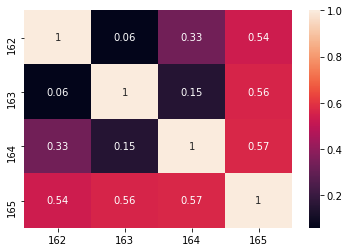

Cluster -  [3 4 1 2]
Number of cluster = 4
Bin -  [166]
Bin -  [167]
Bin -  [168, 169]
                                              168       169
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.075779  8.870287
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.147740  8.907759
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.075779  8.614488
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.075779  8.675912
Intensity_11801 LDC 31-HR BR1 IS IDA-1   5.737056  8.194972
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.075779  7.985004
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.075779  8.614488
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.075779  8.549043
Intensity_11801 LDC 43-HR BR1 IS IDA-1   5.788675  7.765442
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.285622  9.386064


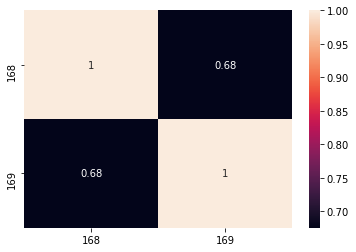

Cluster -  [1 2]
Number of cluster = 2
Bin -  [170, 171, 172]
                                              170       171       172
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.032836  8.969848  8.671177
Intensity_11801 600uE CLDC BR2 IS IDA-1  9.308589  8.827572  8.630411
Intensity_11801 LDC 25-HR BR1 IS IDA-1   9.060385  8.145049  7.714814
Intensity_11801 LDC 25-HR BR2 IS IDA-1   9.060385  8.145049  7.668211
Intensity_11801 LDC 31-HR BR1 IS IDA-1   9.060385  8.100950  7.714814
Intensity_11801 LDC 31-HR BR2 IS IDA-1   9.060385  8.187285  7.401585
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.931699  7.103339  7.759341
Intensity_11801 LDC 37-HR BR2 IS IDA-1   9.060385  7.081297  7.253711
Intensity_11801 LDC 43-HR BR1 IS IDA-1   9.060385  7.925624  7.477384
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.838031  9.021035  8.534101


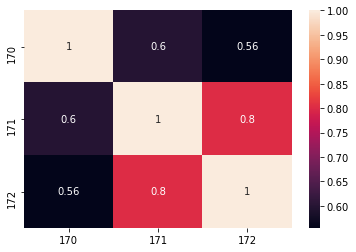

Cluster -  [2 1 1]
Number of cluster = 2
Bin -  [173]
Bin -  [174]
Bin -  [175, 176, 177, 178]
                                              175       176       177  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.678002  6.400839  7.578662   
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.956133  6.761689  7.290593   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.152325  6.939545  7.578662   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.152325  6.939545  7.578662   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.810657  6.939545  7.578662   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.135827  6.939545  7.578662   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.507894  7.671654  8.426634   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   7.799483  7.497723  7.759448   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.811411  6.939545  7.578662   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.879410  6.939545  7.491545   

                                              178  
Intensity_11801 600uE CLDC BR1 IS IDA-1  7.717102

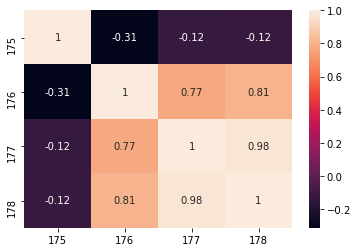

Cluster -  [2 1 1 1]
Number of cluster = 2
Bin -  [179, 180, 181, 182, 183, 184, 185, 186, 187, 188]
                                              179       180       181  \
Intensity_11801 600uE CLDC BR1 IS IDA-1  8.393264  7.288135  6.362545   
Intensity_11801 600uE CLDC BR2 IS IDA-1  7.990296  7.195720  6.519118   
Intensity_11801 LDC 25-HR BR1 IS IDA-1   6.459075  7.268795  6.519118   
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.990296  7.055071  6.519118   
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.592573  7.268795  6.519118   
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.005744  7.268795  6.519118   
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.055259  7.268795  7.246468   
Intensity_11801 LDC 37-HR BR2 IS IDA-1   6.934163  7.268795  6.734711   
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.504017  7.268795  6.519118   
Intensity_11801 LDC 43-HR BR2 IS IDA-1   8.449212  7.290450  6.402431   

                                              182       183       184  \
Intensity_11801 600uE 

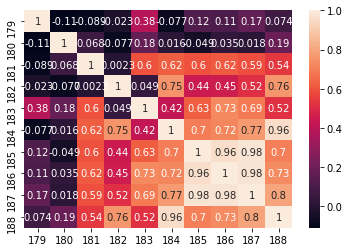

Cluster -  [3 4 1 2 1 1 1 1 1 1]
Number of cluster = 4
Bin -  [189, 190]
                                              189       190
Intensity_11801 600uE CLDC BR1 IS IDA-1  7.398180  7.467440
Intensity_11801 600uE CLDC BR2 IS IDA-1  7.201432  7.245462
Intensity_11801 LDC 25-HR BR1 IS IDA-1   7.110174  7.407099
Intensity_11801 LDC 25-HR BR2 IS IDA-1   7.110174  6.857398
Intensity_11801 LDC 31-HR BR1 IS IDA-1   7.110174  7.407099
Intensity_11801 LDC 31-HR BR2 IS IDA-1   7.110174  7.407099
Intensity_11801 LDC 37-HR BR1 IS IDA-1   6.374258  8.617044
Intensity_11801 LDC 37-HR BR2 IS IDA-1   6.799557  7.407099
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.110174  7.332775
Intensity_11801 LDC 43-HR BR2 IS IDA-1   7.110174  7.581939


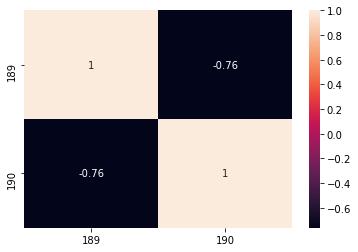

Cluster -  [1 2]
Number of cluster = 2
Bin -  [191]
Bin -  [192]
Bin -  [193]
Bin -  [194]
Bin -  [195, 196]
                                              195       196
Intensity_11801 600uE CLDC BR1 IS IDA-1  9.245796  9.028649
Intensity_11801 600uE CLDC BR2 IS IDA-1  8.926877  9.028647
Intensity_11801 LDC 25-HR BR1 IS IDA-1   8.019971  8.281620
Intensity_11801 LDC 25-HR BR2 IS IDA-1   8.048721  8.281620
Intensity_11801 LDC 31-HR BR1 IS IDA-1   8.732679  8.132742
Intensity_11801 LDC 31-HR BR2 IS IDA-1   8.512080  7.959098
Intensity_11801 LDC 37-HR BR1 IS IDA-1   8.228625  8.281620
Intensity_11801 LDC 37-HR BR2 IS IDA-1   8.512080  8.281620
Intensity_11801 LDC 43-HR BR1 IS IDA-1   7.931249  7.710882
Intensity_11801 LDC 43-HR BR2 IS IDA-1   9.023461  9.047606


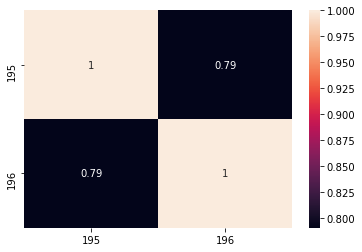

Cluster -  [1 2]
Number of cluster = 2
Bin -  [197]
Bin -  [198]


In [22]:
#retention time tolerance
rt_tol = 0.01
ind = []
j=1
for i in range(0,200):
    if (df3.T.iat[j,2]-df3.T.iat[i,2])>rt_tol:
        print("Bin - ",ind)
        if len(ind)>1:
            corr(ind)
            isotope(ind)
        ind = []
        ind.append(df3.T.index[i])
    else:
        ind.append(df3.T.index[i])
    j=j+1

In [23]:
f = open("anno.txt", "r")
print(f.read())

Annotation	Mass	Mode	Charge	Tier
H	1.007276	Negative	-1	1
2H	2.014552	Negative	-2	1
3H	3.021828	Negative	-3	1
NH4+	18.033823	Negative	-1	2
Na	22.989218	Negative	-1	1
H+Na	23.996494	Negative	-2	1
2H+Na	25.003770	Negative	-3	1
K	38.963158	Negative	-1	2
H+K	39.970434	Negative	-2	2
2H+K	40.977710	Negative	-3	2
2Na	45.978436	Negative	-2	1
H+2Na	46.985712	Negative	-3	1
Na+K	61.952376	Negative	-2	2
H+Na+K	62.959652	Negative	-3	2
3Na	68.967654	Negative	-3	1
2K	77.926316	Negative	-2	2
H+2K	78.933592	Negative	-3	2
2Na+K	84.941594	Negative	-3	2
Na+2K	100.915534	Negative	-3	2
3K	116.889474	Negative	-3	2
H	-1.007276	Negative	-1	1
Cl-	34.969402	Negative	-1	1
COOH-	44.998201	Negative	-1	1
H2O+CO	-46.005479	Both	0	1
NH3+H2O	-35.037114	Both	0	1
H2O	-18.010565	Both	0	1
NH3	-17.026549	Both	0	1
Na-H	21.981945	Both	0	1
MeOH	32.026215	Both	0	1
K-H	37.955882	Both	0	1
Acetonitrile	41.026549	Both	0	1
2Na-2H	43.963890	Both	0	1
HCOOH	46.005479	Both	0	1
NaCl	57.958622	Both	0	1
3Na-3H	65.945835	Both	0	1
NaCOOH	67.

In [41]:
with open(r"anno.txt", "r+") as f: 
    data = f.readlines() 
    result=[]
for x in data:
    result.append(x.split('\t')[1])
f.close()

In [42]:
result

['Mass',
 '1.007276',
 '2.014552',
 '3.021828',
 '18.033823',
 '22.989218',
 '23.996494',
 '25.003770',
 '38.963158',
 '39.970434',
 '40.977710',
 '45.978436',
 '46.985712',
 '61.952376',
 '62.959652',
 '68.967654',
 '77.926316',
 '78.933592',
 '84.941594',
 '100.915534',
 '116.889474',
 '-1.007276',
 '34.969402',
 '44.998201',
 '-46.005479',
 '-35.037114',
 '-18.010565',
 '-17.026549',
 '21.981945',
 '32.026215',
 '37.955882',
 '41.026549',
 '43.963890',
 '46.005479',
 '57.958622',
 '65.945835',
 '67.987424',
 '83.961361',
 '89.969369',
 '113.992903',
 '115.917245',
 '125.946046',
 '135.974848']